In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from scipy.interpolate import interp1d

### Calcul de la magnitude

In [2]:
def magnitude(I1, I2, mag2):
    mag = -2.5 * np.log10(I1/I2) + mag2
    return mag

### Magnitude V des étoiles de comparaison 

In [3]:
# TYC 4394-1693-1
mag1 = 11.40

# TYC 4394-727-1 
mag2 = 11.60

# TYC 4394-863-1 
mag3 = 11.72

# TYC 4394-1219-1
mag4 = 10.88

# TYC 4393-1207-1
mag5 = 10.68

# TYC 4393-1633-1 
mag6 = 11.091

magnitude_comp = np.array([11.40, 11.60, 11.72, 10.88, 10.68, 11.091])
magnitude_comp2 = np.array([11.40, 11.60, 10.88, 10.68, 11.091])     # sans la 3 étoile de comparaison

### Calcul de la phase lors de l'observation 

#### Informations sur SW Dra

In [4]:
sw_dra = SkyCoord.from_name('SW Dra') #coordonnées de SW Dra dans Simbad

p = 0.56966993 #période en jours

periode = p*24*60 #période en minutes

#### Epoque de phase 0 : 

Le début est déterminé par AAVSO pour le maximum de luminosité de SW Dra.

In [5]:
beginn = Time('2023-03-27T00:14:00', format='isot', scale='utc')
begin = beginn.jd

#### Calcul de phase : 

In [6]:
def phase(epoque):
    diff = epoque - begin 
    ratio = math.fmod(diff,p)
    phase = ratio / p 
    return phase 

### Obervation n°1 : phase (supposée) 0.000

In [7]:
time1 = Time('2023-04-14T05:44:43', format='isot', scale='utc')

I_SWDra1 = 107231.0   # intensité de SW Dra

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp1 = np.array([57090.0, 45732.0, 36297.0, 96898.0,117619.0, 81057.0]) 
intensity_comp12 = np.array([57090.0, 45732.0, 96898.0,117619.0, 81057.0]) 

magnitude11 = magnitude(I_SWDra1, intensity_comp1, magnitude_comp)          # toutes les étoiles de comparaison
magnitude12 = magnitude(I_SWDra1, intensity_comp12, magnitude_comp2)        # sans la 3ème
magnitude13 = magnitude(I_SWDra1, intensity_comp1[3:], magnitude_comp[3:])  # avec les 3 dernières

MAG1 = np.mean(magnitude11)
MAG12 = np.mean(magnitude12)
MAG13 = np.mean(magnitude13)

sigma1 = np.std(magnitude11)
sigma12 = np.std(magnitude12)
sigma13 = np.std(magnitude13)

phase1 = phase(time1.jd)

print("La phase correspondant à l'époque", time1, 'est', phase1)

La phase correspondant à l'époque 2023-04-14T05:44:43.000 est 0.00039775978897763537


### Obervation n°2 : phase (supposée) 0.930

In [8]:
time2 = Time('2023-04-15T08:12:52', format='isot', scale='utc')

I_SWDra2 = 105747.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp2 = np.array([57287.0, 47077.0, 38260.0, 102366.0, 124747.0, 85696.0])
intensity_comp22 = np.array([57287.0, 47077.0, 102366.0, 124747.0, 85696.0])

magnitude21 = magnitude(I_SWDra2, intensity_comp2, magnitude_comp)          # toutes les étoiles de comparaison
magnitude22 = magnitude(I_SWDra2, intensity_comp22, magnitude_comp2)        # sans la 3ème
magnitude23 = magnitude(I_SWDra2, intensity_comp2[3:], magnitude_comp[3:])  # avec les 3 dernières

MAG2 = np.mean(magnitude21)
MAG22 = np.mean(magnitude22)
MAG23 = np.mean(magnitude23)

sigma2 = np.std(magnitude21)
sigma22 = np.std(magnitude22)
sigma23 = np.std(magnitude23)

phase2 = phase(time2.jd)

print("La phase correspondant à l'époque", time2, 'est', phase2)

La phase correspondant à l'époque 2023-04-15T08:12:52.000 est 0.9363994454288156


### Obervation n°3 : phase (supposée) 0.785

In [9]:
time3 = Time('2023-04-16T09:29:51', format='isot', scale='utc')

I_SWDra3 = 124436.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp3 = np.array([59005.0, 48468.0, 39839.0, 104136.0, 127491.0, 88645.0])
intensity_comp32 = np.array([59005.0, 48468.0, 104136.0, 127491.0, 88645.0])

magnitude31 = magnitude(I_SWDra3, intensity_comp3, magnitude_comp)
magnitude32 = magnitude(I_SWDra3, intensity_comp32, magnitude_comp2)
magnitude33 = magnitude(I_SWDra3, intensity_comp3[3:], magnitude_comp[3:])

MAG3 = np.mean(magnitude31)
MAG32 = np.mean(magnitude32)
MAG33 = np.mean(magnitude33)

sigma3 = np.std(magnitude31)
sigma32 = np.std(magnitude32)
sigma33 = np.std(magnitude33)

phase3 = phase(time3.jd)
print("La phase correspondant à l'époque", time3, 'est', phase3)

La phase correspondant à l'époque 2023-04-16T09:29:51.000 est 0.7856468645750239


### Obervation n°4 : phase (supposée) 0.600

In [10]:
time4 = Time('2023-04-17T10:16:59', format='isot', scale='utc')

I_SWDra4 = 126514.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp4 = np.array([55618.0, 46690.0, 37692.0, 99999.0, 120740.0, 84476.0])
intensity_comp42 = np.array([55618.0, 46690.0, 99999.0, 120740.0, 84476.0])

magnitude41 = magnitude(I_SWDra4, intensity_comp4, magnitude_comp)
magnitude42 = magnitude(I_SWDra4, intensity_comp42, magnitude_comp2)
magnitude43 = magnitude(I_SWDra4, intensity_comp4[3:], magnitude_comp[3:])

MAG4 = np.mean(magnitude41)
MAG42 = np.mean(magnitude42)
MAG43 = np.mean(magnitude43)

sigma4 = np.std(magnitude41)
sigma42 = np.std(magnitude42)
sigma43 = np.std(magnitude43)

phase4 = phase(time4.jd)
print("La phase correspondant à l'époque", time4, 'est', phase4)

La phase correspondant à l'époque 2023-04-17T10:16:59.000 est 0.5985062546218103


### Obervation n°5 : phase (supposée) 0.885

In [11]:
time5 = Time('2023-04-20T10:37:17', format='isot', scale='utc')

I_SWDra5 = 105710.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp5 = np.array([55741.0, 45522.0, 37680.0, 99059.0, 118279.0, 83707.0])
intensity_comp52 = np.array([55741.0, 45522.0, 99059.0, 118279.0, 83707.0])

magnitude51 = magnitude(I_SWDra5, intensity_comp5, magnitude_comp)
magnitude52 = magnitude(I_SWDra5, intensity_comp52, magnitude_comp2)
magnitude53 = magnitude(I_SWDra5, intensity_comp5[3:], magnitude_comp[3:])

MAG5 = np.mean(magnitude51)
MAG52 = np.mean(magnitude52)
MAG53 = np.mean(magnitude53)

sigma5 = np.std(magnitude51)
sigma52 = np.std(magnitude52)
sigma53 = np.std(magnitude53)

phase5 = phase(time5.jd)
print("La phase correspondant à l'époque", time5, 'est', phase5)

La phase correspondant à l'époque 2023-04-20T10:37:17.000 est 0.8894599514880296


### Obervation n°6 : phase (supposée) 0.410

In [12]:
time6 = Time('2023-04-21T07:21:53', format='isot', scale='utc')

I_SWDra6 = 151248.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp6 = np.array([59605.0, 49998.0, 40694.0, 107009.0, 130575.0, 91043.0])
intensity_comp62 = np.array([59605.0, 49998.0, 107009.0, 130575.0, 91043.0])

magnitude61 = magnitude(I_SWDra6, intensity_comp6, magnitude_comp)
magnitude62 = magnitude(I_SWDra6, intensity_comp62, magnitude_comp2)
magnitude63 = magnitude(I_SWDra6, intensity_comp6[3:], magnitude_comp[3:])

MAG6 = np.mean(magnitude61)
MAG62 = np.mean(magnitude62)
MAG63 = np.mean(magnitude63)

sigma6 = np.std(magnitude61)
sigma62 = np.std(magnitude62)
sigma63 = np.std(magnitude63)

phase6 = phase(time6.jd)
print("La phase correspondant à l'époque", time6, 'est', phase6)

La phase correspondant à l'époque 2023-04-21T07:21:53.000 est 0.40666405484451856


### Obervation n°7 : phase (supposée) 0.026

In [13]:
time7 = Time('2023-04-22T05:28:30', format='isot', scale='utc')

I_SWDra7 = 138512.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp7 = np.array([59760.0, 48583.0, 38731.0, 101310.0, 123022.0, 85747.0])
intensity_comp72 = np.array([59760.0, 48583.0, 101310.0, 123022.0, 85747.0])

magnitude71 = magnitude(I_SWDra7, intensity_comp7, magnitude_comp)
magnitude72 = magnitude(I_SWDra7, intensity_comp72, magnitude_comp2)
magnitude73 = magnitude(I_SWDra7, intensity_comp7[3:], magnitude_comp[3:])

MAG7 = np.mean(magnitude71)
MAG72 = np.mean(magnitude72)
MAG73 = np.mean(magnitude73)

sigma7 = np.std(magnitude71)
sigma72 = np.std(magnitude72)
sigma73 = np.std(magnitude73)

phase7 = phase(time7.jd)
print("La phase correspondant à l'époque", time7, 'est', phase7)

La phase correspondant à l'époque 2023-04-22T05:28:30.000 est 0.023848894040228257


### Obervation n°8 : phase (supposée) 0.000 (again)

In [14]:
time8 = Time('2023-04-23T08:31:52', format='isot', scale='utc')

I_SWDra8 = 90863.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp8 = np.array([44507.0, 36749.0, 30975.0, 80225.0, 97681.0, 67728.0])
intensity_comp82 = np.array([44507.0, 36749.0, 80225.0, 97681.0, 67728.0])

magnitude81 = magnitude(I_SWDra8, intensity_comp8, magnitude_comp)
magnitude82 = magnitude(I_SWDra8, intensity_comp82, magnitude_comp2)
magnitude83 = magnitude(I_SWDra8, intensity_comp8[3:], magnitude_comp[3:])

MAG8 = np.mean(magnitude81)
MAG82 = np.mean(magnitude82)
MAG83 = np.mean(magnitude83)

sigma8 = np.std(magnitude81)
sigma82 = np.std(magnitude82)
sigma83 = np.std(magnitude83)

phase8 = phase(time8.jd)
print("La phase correspondant à l'époque", time8, 'est', phase8)

La phase correspondant à l'époque 2023-04-23T08:31:52.000 est 0.0027807341930929414


### Obervation n°9 : phase (supposée) 0.11

In [15]:
time9 = Time('2023-04-26T06:27:33', format='isot', scale='utc')

I_SWDra9 = 200383.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp9 = np.array([56554.0, 46669.0, 37242.0, 100262.0, 121691.0, 85152.0])
intensity_comp92 = np.array([56554.0, 46669.0, 100262.0, 121691.0, 85152.0])

magnitude91 = magnitude(I_SWDra9, intensity_comp9, magnitude_comp)
magnitude92 = magnitude(I_SWDra9, intensity_comp92, magnitude_comp2)
magnitude93 = magnitude(I_SWDra9, intensity_comp9[3:], magnitude_comp[3:])

MAG9 = np.mean(magnitude91)
MAG92 = np.mean(magnitude92)
MAG93 = np.mean(magnitude93)

sigma9 = np.std(magnitude91)
sigma92 = np.std(magnitude92)
sigma93 = np.std(magnitude93)

phase9 = phase(time9.jd)
print("La phase correspondant à l'époque", time9, 'est', phase9)

La phase correspondant à l'époque 2023-04-26T06:27:33.000 est 0.11744245023854008


### Obervation n°10 : phase (supposée) 0.07

In [16]:
time10 = Time('2023-04-27T09:07:51', format='isot', scale='utc')

I_SWDra10 = 50344.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp10 = np.array([14603.0, 11476.0, 9887.0, 25783.0, 31536.0, 22084.0])
intensity_comp102 = np.array([14603.0, 11476.0, 25783.0, 31536.0, 22084.0])

magnitude101 = magnitude(I_SWDra10, intensity_comp10, magnitude_comp)
magnitude102 = magnitude(I_SWDra10, intensity_comp102, magnitude_comp2)
magnitude103 = magnitude(I_SWDra10, intensity_comp10[3:], magnitude_comp[3:])

MAG10 = np.mean(magnitude101)
MAG102 = np.mean(magnitude102)
MAG103 = np.mean(magnitude103)

sigma10 = np.std(magnitude101)
sigma102 = np.std(magnitude102)
sigma103 = np.std(magnitude103)

phase10 = phase(time10.jd)
print("La phase correspondant à l'époque", time10, 'est', phase10)

La phase correspondant à l'époque 2023-04-27T09:07:51.000 est 0.0682553431400173


### Obervation n°11 : phase (supposée) 0.23

In [19]:
time11 = Time('2023-04-29T04:22:27', format='isot', scale='utc')

I_SWDra11 = 170867.0

# intensité des étoiles de comparaison dans l'ordre dans lequel elles sont données plus haut

intensity_comp11 = np.array([60153.0, 49874.0, 39376.0, 103355.0, 125547.0, 87589.0])
intensity_comp112 = np.array([60153.0, 49874.0, 103355.0, 125547.0, 87589.0])

magnitude111 = magnitude(I_SWDra11, intensity_comp11, magnitude_comp)
magnitude112 = magnitude(I_SWDra11, intensity_comp112, magnitude_comp2)
magnitude113 = magnitude(I_SWDra11, intensity_comp11[3:], magnitude_comp[3:])

MAG11 = np.mean(magnitude111)
MAG112 = np.mean(magnitude112)
MAG113 = np.mean(magnitude113)

sigma11 = np.std(magnitude111)
sigma112 = np.std(magnitude112)
sigma113 = np.std(magnitude113)

phase11 = phase(time11.jd)
print("La phase correspondant à l'époque", time11, 'est', phase11)

La phase correspondant à l'époque 2023-04-29T04:22:27.000 est 0.23114925930734093


### 2 observations en phase 0.000

In [20]:
print(MAG13, MAG83)

print(sigma1, sigma8)



10.77918479470913 10.758439048997053
0.08500740503916202 0.08393229851270964


### Moyenne des magnitudes et calcul d'erreurs

In [22]:
PHASE = np.array([phase1, phase2, phase3, phase4, phase5, phase6, phase7, phase9, phase10, phase11])

MAGNITUDE1 = np.array([MAG1, MAG2, MAG3, MAG4, MAG5, MAG6, MAG7, MAG9, MAG10, MAG11])

MAGNITUDE2 = np.array([MAG12, MAG22, MAG32, MAG42, MAG52, MAG62, MAG72, MAG92, MAG102, MAG112])

MAGNITUDE3 = np.array([MAG13, MAG23, MAG33, MAG43, MAG53, MAG63, MAG73, MAG93, MAG103, MAG113])

# erreurs associées (écart type)

errors1 = np.array([sigma1, sigma2, sigma3, sigma4, sigma5, sigma6, sigma7, sigma9, sigma10, sigma11])

errors2 = np.array([sigma12, sigma22, sigma32, sigma42, sigma52, sigma62, sigma72, sigma92, sigma102, sigma112])

errors3 = np.array([sigma13, sigma23, sigma33, sigma43, sigma53, sigma63, sigma73, sigma93, sigma103, sigma113])

### Courbe de lumière 

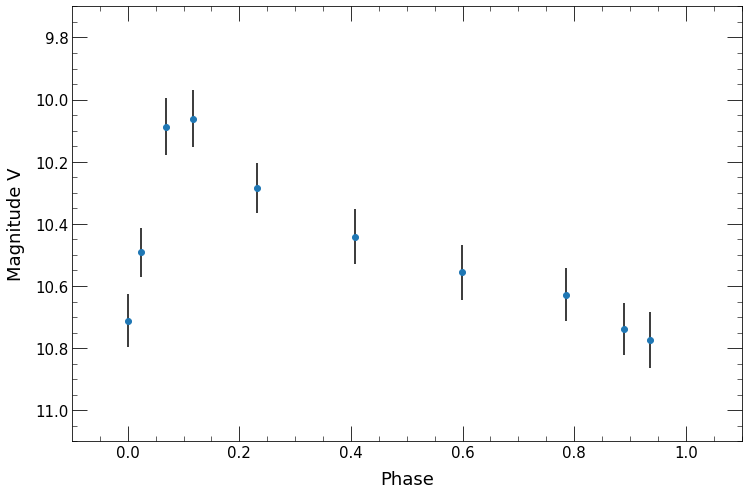

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(PHASE, MAGNITUDE1, "b.")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.errorbar(PHASE, MAGNITUDE1, xerr=0, yerr=errors1, ecolor='k', fmt='o', capthick=2)
plt.show()

#### En enlevant la 3e étoile de comparaison :

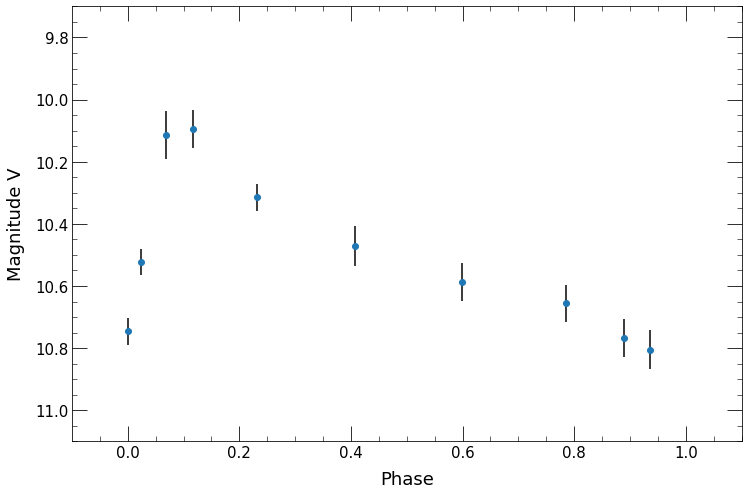

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(PHASE, MAGNITUDE2, "b.")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.errorbar(PHASE, MAGNITUDE2, xerr=0, yerr=errors2, ecolor='k', fmt='o', capthick=2)
plt.show()

#### En prenant les 3e dernières étoiles de comparaison

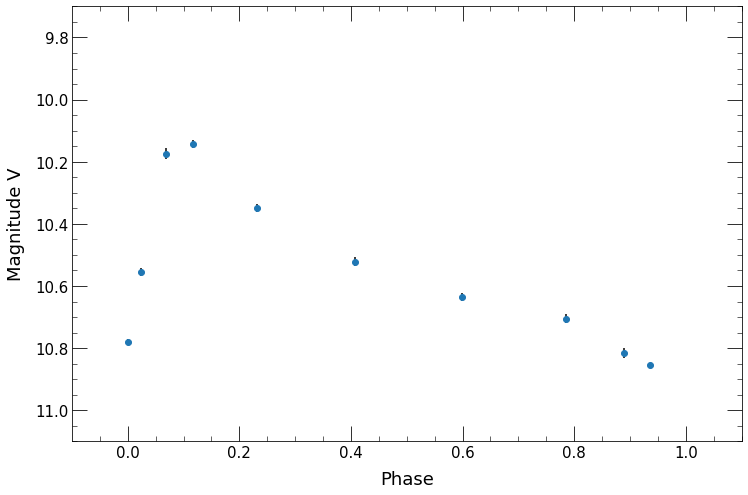

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(PHASE, MAGNITUDE3, "b.")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.errorbar(PHASE, MAGNITUDE3, xerr=0, yerr=errors3, ecolor='k', fmt='o', capthick=2)
plt.show()

#### Courbe de lumière attendue et test de fit

In [26]:
# Observations "cibles"
phaseref1 = np.array([0., 0.2003, 0.4094, 0.5943, 0.6868, 0.7824, 0.8508, 0.8994, 0.9308, 0.9602])
magnituderef1 = np.array([9.971, 10.344, 10.616, 10.736, 10.736, 10.843, 10.888, 10.691, 10.307, 10.148])

# Observations attendues
phaseref3 = np.array([0, 0.1227, 0.9161, 0.9602, 1])
magnituderef3 = np.array([9.971, 10.215, 10.476, 10.148, 9.971])

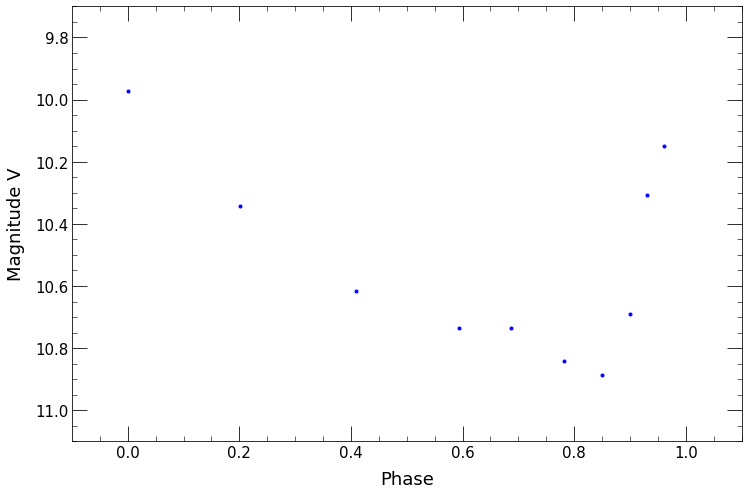

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(phaseref1, magnituderef1, "b.")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.show()

#### Courbe de lumière comparaison

In [28]:
# Données article de référence

phaseref2 = np.array([0.3527,0.3671,0.3787,0.4094,0.4215,0.4503,0.4568,0.4823,0.4888,0.5109,0.5169,0.5448,0.5553,0.5873,0.5943,0.6188,0.6255,0.6504,0.6568,0.6784,0.6868,0.8125,0.8192,0.8404,0.8469,0.8508,0.8555,0.8834,0.8877,0.892,0.8936,0.8956,0.8975,0.8994,0.9015,0.9033,0.9084,0.9105,0.9122,0.9142,0.9161,0.918,0.9203,0.9236,0.9254,0.9273,0.9291,0.9308,0.9328,0.9347,0.9394,0.9415,0.9435,0.9452,
                   0.9472,0.9489,0.951,0.9528,0.9547,0.9566,0.9584,0.9602,0.9621,0.964,0.9665,0.9682,0.9702,0.9717,0.9737,0.976,0.9777,0.9796,0.9814,0.9831,0.9881,0.9898,0.9916,0.9935,0.9954,0.9975,0,0.0028,0.0047,0.0068,0.0086,0.0105,0.0128,0.0146,0.0169,0.0186,0.0205,0.0225,0.027,0.0289,0.0305,0.0327,0.0533,0.0578,0.062,0.0851,0.0895,0.0936,0.1227,0.1273,0.1315,0.1586,0.1611,0.1655,
                   0.1957,0.2003,0.2047,0.2338,0.2382,0.2424,0.2647,0.2688,0.2749,0.303,0.3072,0.3112,0.3372,0.3418,0.346,0.37,0.3744,0.3786,0.4162,0.4202,0.4246,0.4826,0.4864,0.4905,0.7461,0.7505,0.7547,0.7737,0.778,0.7824,0.811,0.8154,0.8516,0.8556,0.8598,0.8828,0.8874,0.8916,0.8936,0.8953,0.8972,0.0134,0.0181,0.0233,0.0259,0.0289,0.0861,0.0903,0.0947,0.147,0.1511,0.1555, 
                     1.0028, 1.0047, 1.0068, 1.0086, 1.0105, 1.0128, 1.0146, 1.0169, 1.0186, 1.0205, -0.0186, -0.0169, -0.0119, -0.0102, -0.0084, -0.0065, -0.0046, -0.0025])


magnituderef2 = np.array([10.553,10.575,10.57,10.616,10.617,10.639,10.643,10.642,10.668,10.687,10.682,10.711,10.714,10.736,10.736,10.742,10.744,10.738,10.737,10.737,10.736,10.878,10.884,10.896,10.895,10.888,10.894,10.808,10.783,10.744,10.734,10.726,10.699,10.691,10.669,10.618,10.58,10.559,10.537,10.504,10.476,10.44,10.411,10.369,10.355,10.33,10.322,10.307,10.306,10.297,10.288,10.270,10.265,10.255,
                       10.246,10.232,10.22,10.204,10.191,10.171,10.161,10.148,10.135,10.118,10.091,10.077,10.064,10.049,10.043,10.033,10.023,10.007,10.001,9.998,9.981,9.978,9.973,9.971,9.969,9.965,9.971,9.972,9.971,9.978,9.967,9.978,9.976,9.986,9.984,9.986,9.996,9.99,10.007,10.006,10.012,10.014,10.062,10.071,10.083,10.136,10.143,10.153,10.215,10.213,10.224,10.266,10.275,10.28,
                       10.335,10.344,10.347,10.4,10.405,10.412,10.446,10.452,10.453,10.493,10.497,10.499,10.535,10.545,10.544,10.574,10.576,10.578,10.616,10.613,10.625,10.665,10.667,10.725,10.795,10.797,10.802,10.832,10.839,10.843,10.88,10.883,10.891,10.881,10.881,10.811,10.782,10.75,10.736,10.722,10.705,9.982,9.989,9.998,10.002,10.007,10.138,10.142,10.152,10.259,10.261,10.268, 
                         9.972, 9.971, 9.978, 9.967, 9.978, 9.976, 9.986, 9.984, 9.986, 9.996, 10.001, 9.998, 9.981, 9.978, 9.973, 9.971, 9.969, 9.965])

#### Décalage de la phase 

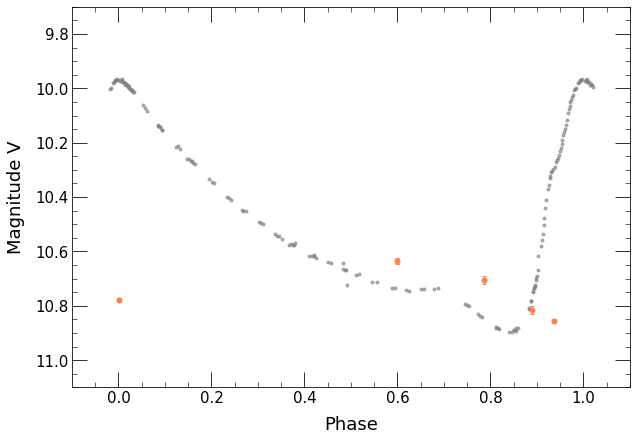

In [29]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(phaseref2, magnituderef2, ".", alpha=0.6, color='0.5')
# ax.plot(phaseref3, magnituderef3, "g.", markersize=12)
# ax.plot(movedphase2, MAGNITUDE3, "b.")
plt.errorbar(PHASE[:5], MAGNITUDE3[:5], xerr=0, yerr=errors3[:5], capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.savefig('courbe lumiere decalee.pdf')
plt.show()

### Décalage et comparaison avec seulement les 3 dernières étoiles de comparaison

#### phase décalée de -0.100

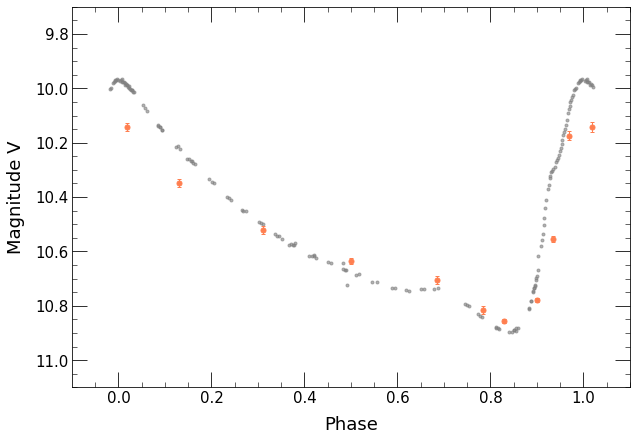

In [31]:
movedphase = np.array([0.900, 0.830, 0.685, 0.500, 0.785, 0.310, 0.935, 0.01744, 0.968255, 0.131149])

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(phaseref2, magnituderef2, ".", alpha=0.6, color='0.5')
# ax.plot(phaseref3, magnituderef3, "g.", markersize=12)
# ax.plot(movedphase2, MAGNITUDE3, "b.")
plt.errorbar(movedphase, MAGNITUDE3, xerr=0, yerr=errors3, capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.errorbar(1.01744245, MAG93, xerr=0, yerr=errors3[8], capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.show()

#### phase décalée de -0.105

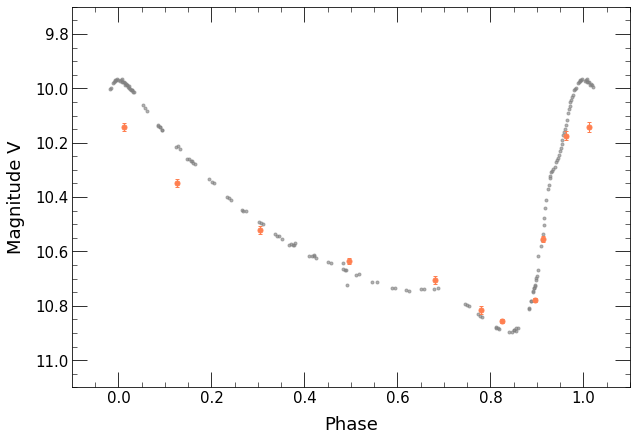

In [36]:
movedphase2 = np.array([0.895, 0.825, 0.680, 0.495, 0.780, 0.305, 0.91384, 0.01244, 0.963255, 0.126149])


fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(phaseref2, magnituderef2, ".", alpha=0.6, color='0.5')
# ax.plot(phaseref3, magnituderef3, "g.", markersize=12)
# ax.plot(movedphase2, MAGNITUDE3, "b.")
plt.errorbar(movedphase2, MAGNITUDE3, xerr=0, yerr=errors3, capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.errorbar(1.01244245, MAG93, xerr=0, yerr=errors3[8], capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.savefig("courbe de lumière.pdf")
plt.show()

#### phase décalée de -0.110

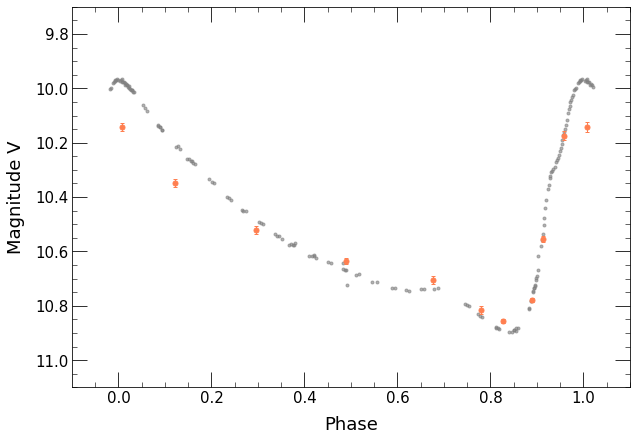

In [33]:
movedphase3 = np.array([0.8904, 0.8264, 0.67564, 0.48850, 0.77946, 0.296664, 0.913849, 0.00744245, 0.958255, 0.121149])

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(phaseref2, magnituderef2, ".", alpha=0.6, color='0.5')
# ax.plot(phaseref3, magnituderef3, "g.", markersize=12)
# ax.plot(movedphase2, MAGNITUDE3, "b.")
plt.errorbar(movedphase3, MAGNITUDE3, xerr=0, yerr=errors3, capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.errorbar(1.00744245, MAG93, xerr=0, yerr=errors3[8], capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.savefig("image.pdf")
plt.show()

#### phase décalée de 0.115

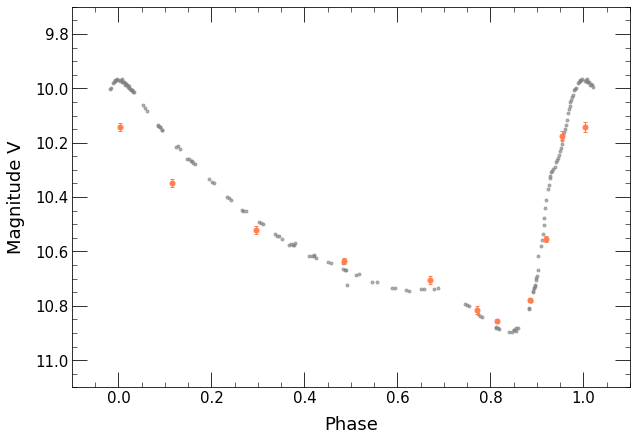

In [34]:
movedphase4 = np.array([0.885, 0.815, 0.670, 0.485, 0.770, 0.295, 0.920, 0.00244245, 0.953255, 0.116149])


fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(phaseref2, magnituderef2, ".", alpha=0.6, color='0.5')
# ax.plot(phaseref3, magnituderef3, "g.", markersize=12)
# ax.plot(movedphase2, MAGNITUDE3, "b.")
plt.errorbar(movedphase4, MAGNITUDE3, xerr=0, yerr=errors3, capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.errorbar(1.00244245, MAG93, xerr=0, yerr=errors3[8], capsize = 2, lw=1, fmt='.', markersize=10, color="coral")
plt.minorticks_on()
ax.tick_params(direction='in', which='both', axis='both', top='True', right='True')
ax.tick_params(axis='both', which='major', labelsize=15, size=15)
ax.tick_params(axis='both', which='minor', size=5)
ax.set_xlabel('Phase', size=18, labelpad=10)
ax.set_ylabel('Magnitude V', size=18, labelpad=10)
plt.ylim(9.7, 11.1, 0.2)
plt.xlim(-0.1, 1.1)
plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(9.80, 11.1, 0.2))
plt.gca().invert_yaxis()
plt.show()